In [407]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [408]:
train_data = pd.read_csv('Training Matches IPL 2008-2019.csv')
train_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [409]:
train_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [410]:
train_data['city'].fillna('Abu Dhabi',inplace=True)
train_data['winner'].fillna('Draw', inplace = True)

In [411]:
#Both Rising Pue Supergiant and Rising Pune Supergiants represents same team similarly Delhi Capitals and Delhi Daredevils,
#Deccan Chargers and Sunrisers Hyderabad
train_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
train_data.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
train_data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

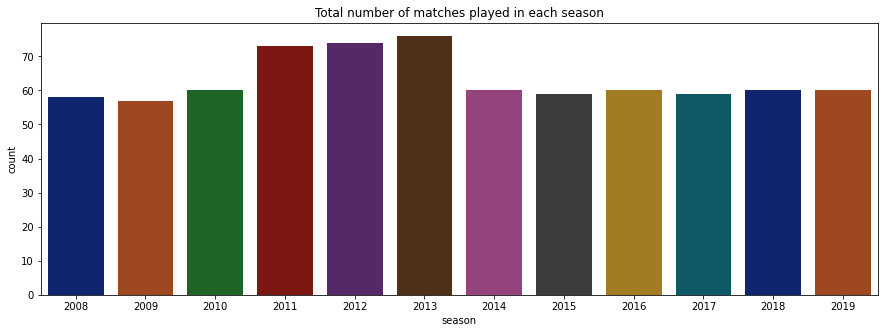

In [412]:
import seaborn as sns
plt.subplots(figsize = (15,5))
sns.countplot(x = 'season' , data = train_data, palette='dark')
plt.title('Total number of matches played in each season')
plt.show()

In [413]:
train_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL", "Pune Warriors":"PW"}, inplace=True)
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'toss_winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
          'winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12,'Draw':13}}
train_data.replace(encode, inplace=True)
train_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,1,7,7,field,normal,0,1,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,2,6,2,bat,normal,0,2,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,3,8,3,bat,normal,0,8,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,4,7,4,bat,normal,0,7,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,5,1,5,bat,normal,0,1,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [414]:
dicVal = encode['winner']
train = train_data[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
train.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,7,Bangalore,field,7,M Chinnaswamy Stadium,1
1,2,6,Chandigarh,bat,2,"Punjab Cricket Association Stadium, Mohali",2
2,3,8,Delhi,bat,3,Feroz Shah Kotla,8
3,4,7,Mumbai,bat,4,Wankhede Stadium,7
4,5,1,Kolkata,bat,5,Eden Gardens,1


In [415]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(train)
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


In [416]:
X = df[['team1', 'team2', 'venue']]
y = df[['winner']]

import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)

In [417]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
print("Fitting Various Models:")
logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print("Logistic Regression accuracy: ",(logistic_model.score(X,y))*100)
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest accuracy: ", (Random_model.score(X,y))*100)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNeighbor Classifier accuracy", (knn_model.score(X,y))*100)
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayis accuracy: " ,(NB_model.score(X,y))*100)
from sklearn import tree
decision_model = tree.DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X,y)
print("SVM accuracy: ", (svm_model.score(X,y))*100)

Fitting Various Models:
Logistic Regression accuracy:  25.264550264550266
Random Forest accuracy:  81.48148148148148
KNeighbor Classifier accuracy 61.50793650793651
Gaussion Navie Bayis accuracy:  34.78835978835979
Decision Tree Classifier accuracy:  81.48148148148148
SVM accuracy:  50.132275132275126


In [418]:
test_data = pd.read_csv('Testset Matches IPL 2020.csv')
encode = {'team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12},
         'team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'KXIP':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GL':11,'PW':12}}
test_data.replace(encode,inplace=True)
var_mod = ['venue']
le = LabelEncoder()
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])

In [419]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
test_X = test_data[['team1','team2','venue']]
test_X = sc.fit_transform(test_X)
y_predict = decision_model.predict(test_X)
newlist = list()
for i in y_predict:
    newlist.append(list(dicVal.keys())[list(dicVal.values()).index(i)]) 
test_data['winner'] = newlist
test_data['venue'] = le.inverse_transform(test_data['venue'])
for i in range(64):
    test_data['team1'][i]=(list(dicVal.keys())[list(dicVal.values()).index(test_data['team1'][i])]) 
    test_data['team2'][i]=(list(dicVal.keys())[list(dicVal.values()).index(test_data['team2'][i])]) 
test_data.loc[test_data["winner"]==test_data["team1"],"winner_team"]=1
test_data.loc[test_data["winner"]!=test_data["team1"],"winner_team"]=2
test_data['win_by_number']=test_data['winner_team'].astype(int)
test_data.tail()

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3,winner,winner_team,win_by_number
59,1237181,2020,Dubai (DSC),11/10/2020,DC,MI,TA Boult,Dubai International Cricket Stadium,Chris Gaffaney,Nitin Menon,Anil Chaudhary,DC,1.0,1
60,1216505,2022,Abu Dhabi,11/2/2020,DC,RCB,Anrich Nortje,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma,DC,1.0,1
61,1216631,2022,Sharjah,22/15/2020,RCB,KXIP,KL Rahul,Sharjah Cricket Stadium,KN Ananthapadmanabhan,Chettithody Shamshuddin,Richard Illingworth,RCB,1.0,1
62,1216679,2022,Abu Dhabi,10/11/2022,KXIP,SRH,Q de Kock,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma,KXIP,1.0,1
63,1216598,2020,Dubai (DSC),10/24/2020,DC,MI,CJ Jordan,Dubai International Cricket Stadium,Anil Dandekar,Paul Reiffel,Nitin Menon,DC,1.0,1


In [431]:

res=test_data[['team1','team2','winner']]
print(res.tail(4))
print("\n")
print("After choosing id3 classifier:")
print("team\t\tprobability of qualifying:")
print("DC:\t\t50%\nRCB:\t\t25%\nKXIP(PBKS):\t25%")
print("\n")
print("note: the accuracy of the chosen model is 81.48% and the real outcome may vary")

   team1 team2 winner
60    DC   RCB     DC
61   RCB  KXIP    RCB
62  KXIP   SRH   KXIP
63    DC    MI     DC


After choosing id3 classifier:
team		probability of qualifying:
DC:		50%
RCB:		25%
KXIP(PBKS):	25%


note: the accuracy of the chosen model is 81.48% and the real outcome may vary


In [421]:
test_X

array([[-0.36842105, -1.17623939,  1.17435474],
       [ 1.31578947,  0.65984161, -1.06918865],
       [ 0.05263158,  1.11886186, -1.06918865],
       [-0.78947368, -1.17623939,  0.05258305],
       [-1.63157895, -0.25819889,  1.17435474],
       [ 0.47368421,  1.11886186, -1.06918865],
       [-1.21052632,  1.5778821 , -1.06918865],
       [-1.63157895,  0.20082136,  1.17435474],
       [-0.78947368,  0.65984161,  0.05258305],
       [ 0.89473684, -0.25819889, -1.06918865],
       [ 1.31578947,  0.20082136,  1.17435474],
       [-0.78947368, -1.63525964, -1.06918865],
       [ 0.47368421, -0.25819889,  1.17435474],
       [-1.21052632,  0.20082136, -1.06918865],
       [ 0.89473684, -0.71721914,  1.17435474],
       [ 1.31578947, -1.63525964,  0.05258305],
       [-0.36842105,  0.20082136,  0.05258305],
       [ 0.47368421, -1.17623939, -1.06918865],
       [ 0.89473684,  1.5778821 , -1.06918865],
       [-0.36842105, -0.71721914,  1.17435474],
       [-1.63157895, -1.17623939,  1.174

In [422]:
test_X = sc.fit_transform(test_X)
y_predict = Random_model.predict(test_X)